<a href="https://colab.research.google.com/github/abhirbhandary/Python/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.&nbsp; K- Means for Playlist Creation using Spotify Data

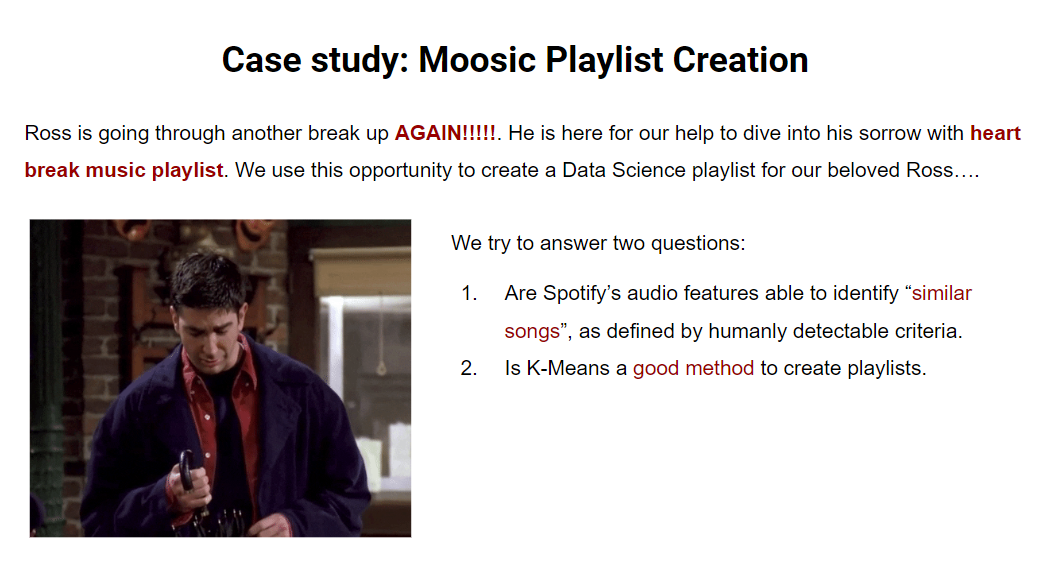

## A. Import relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## B. Load the data

In [3]:
# Load and clean dataframe
# 5000 songs
url = "https://drive.google.com/file/d/1uWpkuAZYHSN9upJgxU-cdzVF4xVpdLSo/view?usp=share_link"
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
songs = pd.read_csv(path)

In [ ]:
songs.drop_duplicates()
songs.dropna()

In [5]:
songs.columns = songs.columns.str.strip()  # Remove whitespace from column names
songs = songs.drop(['id','type','html'], axis=1)  # Remove column with 0 variance
# Variance is zero means that all values are same then if all the values are same ,then what is the use of any analysis

In [ ]:
songs.info()

## C. Describe the Data Set



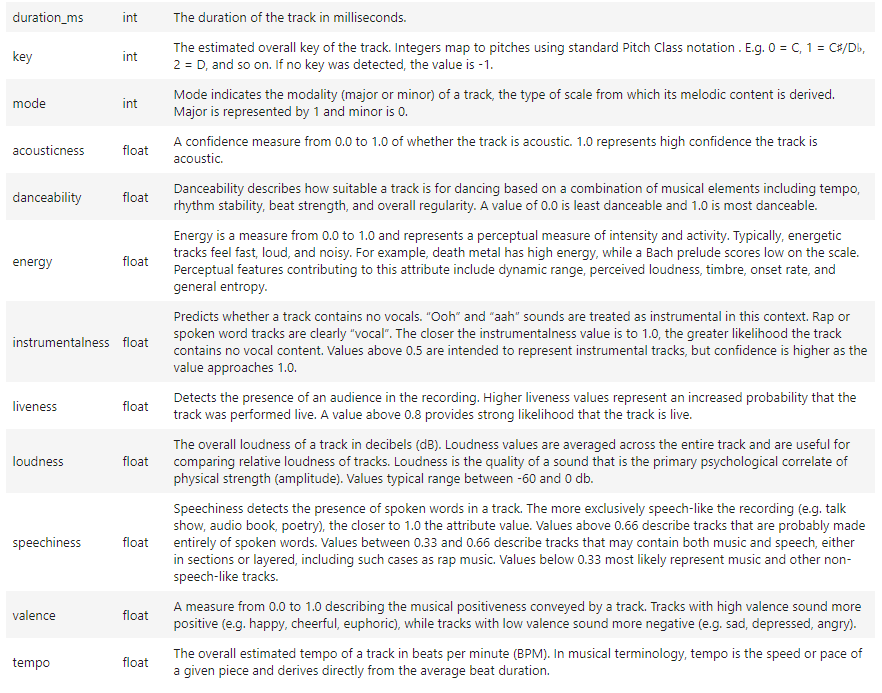

## D. Variable Analysis

In [6]:
X_con = songs.iloc[:,2:13]

In [7]:
X_con.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376
1,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039
2,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698
3,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802
4,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941


### a. Test 1

**Variable Distribution**

In addition to visualizing the relationship between each attribute, I want to know how each attribute is distributed within the data. To visualize this distribution, I utilize the **histogram** function found in the Pandas library. This function allows me to plot out and visualize **how frequently each attribute is distributed within each quantile, or equally sized subgroups, of the data**.

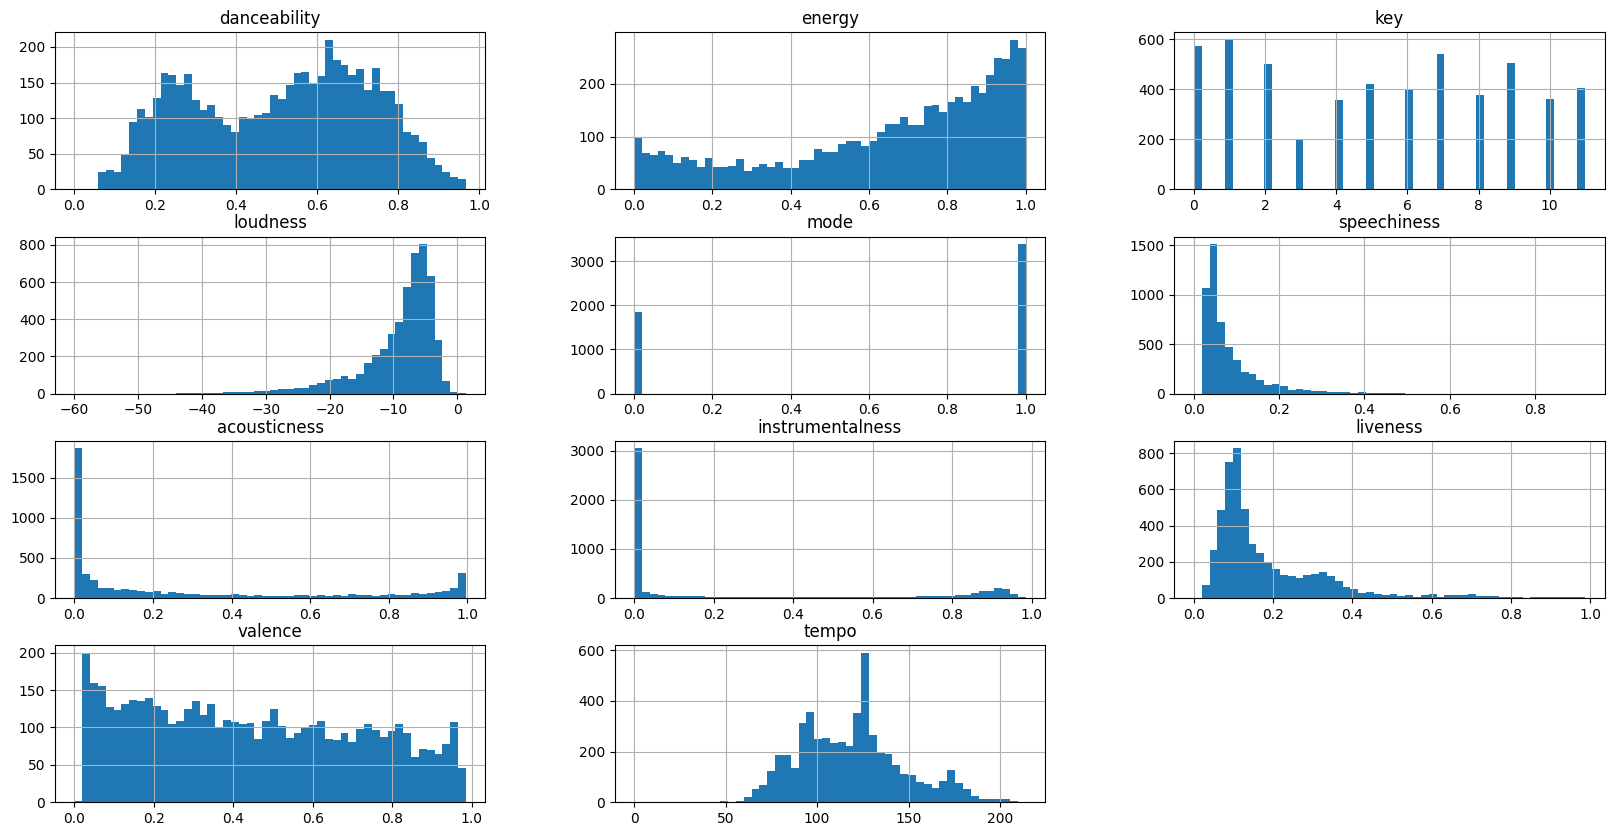

In [8]:
X_con.hist(bins=50, figsize=(20,10))
plt.show()

The audio features are heavily skewed.

Loudness

Liveliness

Acousticness

Speechiness

In [ ]:
X_con[['instrumentalness']].hist(figsize=(10,5))
plt.show()

**An observation: The variable 'instrumentalness' is strongly biased to the right (long tail in the left). This means that most songs are instrumental content with low vocal content.**

We add instrumentalness to our feature selection

It is evident from these histograms that, within my data, there are normal distributions for the attributes **danceability, energy, valence and temp**, while there are non-normal distributions for the attributes **acousticness, instrumentalness, liveness, loudness, and speechiness**. Now that I understand how my data are both related and distributed, I can begin to cluster my data by their similarities.

### b. Test 2

Correlation

Filtering by correlation could show how much information is dispersed in each pair of variables. For this task, a correlation index magnitude bigger than 0.6 is a high correlation, and less than 0.15 is considered a low correlation.

<Axes: >

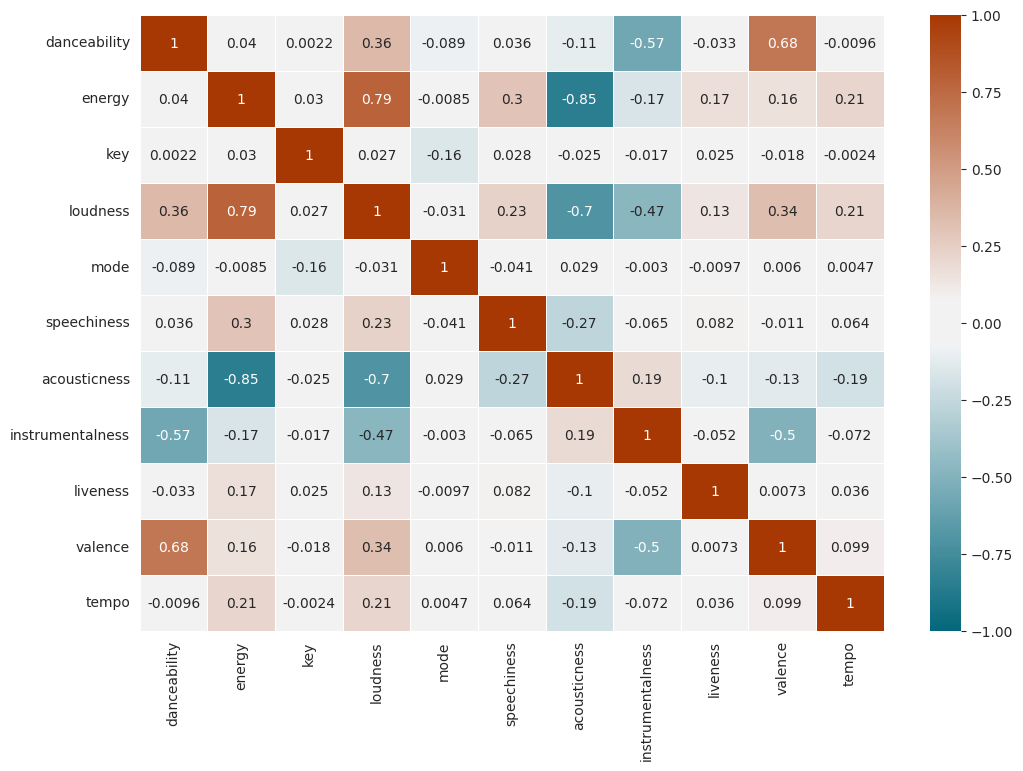

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))

cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap(X_con.corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

We can see that all the variables have a low correlation with each other aside from

1. Strong positive correlation between Energy and Loudnesss and good corrrelation Danceability and Valence, Loudnesss and Danceability and Loudness and Valence.

2. **Negative Correlation** between **Energy and Acoustics** and **Loudness and Acoustics**.

To avoid Multicollinearity we drop  Loudnesss and Valence from feature selection.


In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_con)
plt.title('Scaled song characteristics', fontdict={'fontsize':20})
plt.ylabel('Value', fontdict={'fontsize':12})
plt.xticks(rotation=45)


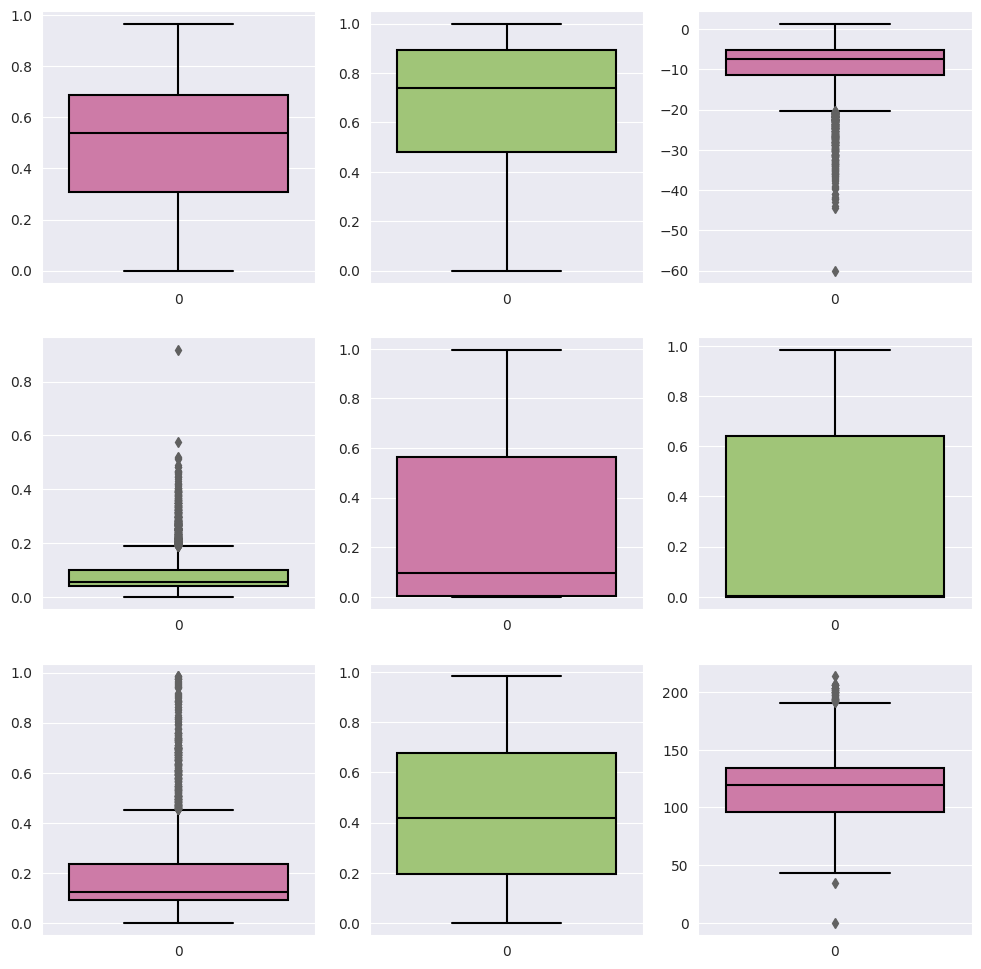

In [ ]:
props = {'whiskerprops': {'color': 'black'}, 'boxprops': {'edgecolor': 'black'}, 'capprops': {'color': 'black'},
         'medianprops': {'color': 'black'}}
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.set_style('whitegrid')
sns.boxplot( X_con["danceability"], ax=axes[0, 0],  color = '#DB6DA8', **props)
sns.boxplot( X_con["energy"] , ax=axes[0, 1], color = '#A1D26B', **props)
sns.boxplot( X_con["loudness"], ax=axes[0, 2],  color = '#DB6DA8', **props)
sns.boxplot( X_con["speechiness"] , ax=axes[1, 0], color = '#A1D26B', **props)
sns.boxplot( X_con["acousticness"] ,  ax=axes[1, 1],  color = '#DB6DA8', **props)
sns.boxplot( X_con["instrumentalness"] ,  ax=axes[1, 2], color = '#A1D26B', **props)
sns.boxplot( X_con["liveness"] ,  ax=axes[2, 0], color = '#DB6DA8', **props)
sns.boxplot( X_con["valence"] ,  ax=axes[2, 1], color = '#A1D26B', **props)
sns.boxplot( X_con["tempo"] ,  ax=axes[2, 2], color = '#DB6DA8', **props)

plt.show()

## E. Choosing the features

In [ ]:
# Set 1
cluster_features = ['loudness', 'speechiness', 'acousticness','instrumentalness','liveness']
df_cluster = X_con[cluster_features]

In [ ]:
# Set 2
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
df_cluster = X_con[cluster_features]

In [ ]:
# Set 3
cluster_features = ['danceability','energy','loudness','valence','tempo']
df_cluster = X_con[cluster_features]

In [ ]:
X_con.head(2)

In [ ]:
# Set 4 We select this
cluster_features = ['danceability','energy','acousticness','instrumentalness']
df_cluster = X_con[cluster_features]

In [ ]:
# Set 5
cluster_features = ['danceability','tempo']
df_cluster = X_con[cluster_features]

In [ ]:
#set 6 Ross Playlist
cluster_features = ['danceability','key','mode','valence','tempo']
df_cluster = X_con[cluster_features]

In [ ]:
df_cluster

,danceability,key,mode,valence,tempo
0,0.4800,5,0,0.8970,82.315
1,0.4230,4,0,0.4380,81.025
2,0.5290,0,1,0.2800,96.134
3,0.4490,9,1,0.3040,91.330
4,0.6050,7,1,0.6940,99.419
...,...,...,...,...,...
605,0.2020,3,1,0.0655,87.906
606,0.1880,6,1,0.0355,83.134
607,0.0596,9,1,0.0344,71.573
608,0.1330,4,1,0.0591,67.109


## F. Scaling`

Using MinMaxScaler

In [ ]:
# Standardization
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_cluster[:] = MinMaxScaler().fit_transform(df_cluster) # has to be same name as the orginal data frame

<ipython-input-33-66b8df7c7cd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[:] = MinMaxScaler().fit_transform(df_cluster) # has to be same name as the orginal data frame
<ipython-input-33-66b8df7c7cd3>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cluster[:] = MinMaxScaler().fit_transform(df_cluster) # has to be same name as the orginal data frame


In [ ]:
df_cluster.describe()

,danceability,key,mode,valence,tempo
count,610.000000,610.000000,610.000000,610.000000,610.000000
mean,0.330404,0.470492,0.618033,0.168629,0.412040
std,0.198370,0.312501,0.486267,0.185768,0.196274
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.159308,0.181818,0.000000,0.035945,0.242498
50%,0.319966,0.454545,1.000000,0.105475,0.378244
75%,0.477250,0.727273,1.000000,0.231749,0.558973
max,1.000000,1.000000,1.000000,1.000000,1.000000


## G. Find the number of Clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Elbow Method & Silhouette Score

In [ ]:
# Find the ideal number of clusters
def find_optimal_k_clusters_plot(dataframe, features_name, minK, maxK, titlePlot, random_state = 11):
    """
    This function displays a plot of the Within Cluster Sum Squares (WCSS) and the
    Silhouette Score. The objective of this function is to visually identify the
    optimal number of clusters

    * **`dataframe`** (_pandas.DataFrame_): The dataframe previously processed
    * **`features_names`** (_array like_): A list or ndarray with the name of the columns/features to be used.
    * **`minK`** and **`maxK`** (_int_): are the minimun (inclusive) and maximum (non inclusive)
    amount of clusters to test.
    * **`random_state`** (_default = 11_): Is a random seed for reproducibility
    """
    X = dataframe[features_name].values
    wcss = []
    list_models = []

    for i in range(minK, maxK):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state)
        kmeans.fit(X)
        list_models.append(kmeans)
        wcss.append(kmeans.inertia_)

    sil_scores = [silhouette_score(X, model.labels_, random_state=random_state)
                  for model in list_models[1:]]

    # P L O T   R E S U L T S
    fig, ax1 = plt.subplots(figsize = (6,4.5), dpi=100, facecolor='white')
    ax1.set_facecolor('white')
    fig.suptitle(titlePlot, size=13)
    ax1.plot(range(minK, maxK), wcss,
             linestyle = '--', marker = 'P', color = 'teal', label = 'WCSS')
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('WCSS')
    ax1.tick_params(axis = 'y', colors = 'teal')
    ax1.yaxis.label.set_color('teal')

    ax2 = ax1.twinx()
    ax2.plot(range(minK + 1, maxK), sil_scores,
             linestyle = ':', marker = 'o', color = 'maroon', label = 'Silhouette score')
    ax2.set_ylabel('Silhouette Score')
    ax2.tick_params(axis = 'y', colors = 'maroon')
    ax2.yaxis.label.set_color('maroon')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

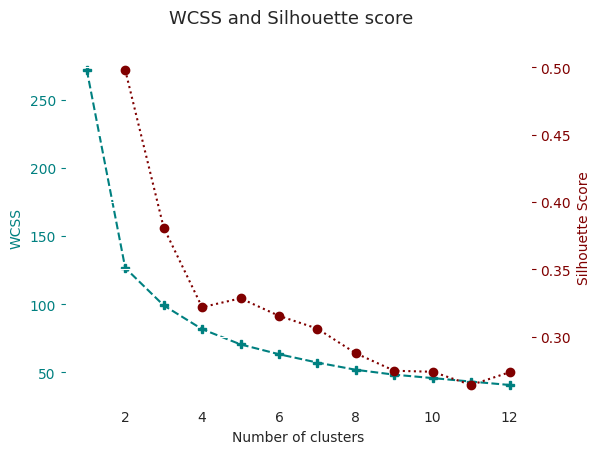

In [ ]:
find_optimal_k_clusters_plot(dataframe = df_cluster,
                             features_name = cluster_features,
                             minK = 1, maxK= 13, titlePlot="WCSS and Silhouette score")

The Silhouette score measures how close each example in the cluster is to the points in the neighboring cluster. The closer it is to +1 the better the clusters are, and so we have a pretty high score indicating our examples belong to quite distinct groups. Let's proceed to train our kmeans model with k=4

In [ ]:
# Extra
ssds = [ ]
for k in [1, 2, 3, 5, 10, 20, 30, 40, 50, 75, 100, 125, 150, 200, 300, 400, 500, 1000]:
    print("clustering with %d clusters..." % k)
    kmeans = KMeans(n_clusters = k).fit(df_cluster)
    ssds.append({"k": k, "ssd": kmeans.inertia_})

In [ ]:
# Extra Small Data Set
ssds = [ ]
for k in [1, 2, 3, 5, 10, 20, 30, 40, 50, 75, 100, 125, 150, 200, 300, 400]:
    print("clustering with %d clusters..." % k)
    kmeans = KMeans(n_clusters = k).fit(df_cluster)
    ssds.append({"k": k, "ssd": kmeans.inertia_})

In [ ]:
# Extra
import matplotlib.pyplot as plt

ssds_df = pd.DataFrame(ssds)
plt.rcParams['figure.figsize'] = [12, 4]
plt.subplot(1, 2, 1)
plt.scatter(ssds_df["k"], ssds_df["ssd"])
plt.xlabel("number of clusters")
plt.ylabel("similarity (sum square of distance)")
plt.subplot(1, 2, 2)
ssds_df_short = ssds_df[ssds_df["k"] <= 100]
plt.scatter(ssds_df_short["k"], ssds_df_short["ssd"])
plt.xlabel("number of clusters")
plt.ylabel("similarity (sum square of distance)")
plt.show()

## H. Applying K means
Once the number of clusters is defined, apply the algorithm and label the observations

In [ ]:
kmeans_01 = KMeans(n_clusters=4, init='k-means++', random_state=11)
kmeans_01.fit(df_cluster)

In [ ]:
# For Ross cluster 1 we use
kmeans_01 = KMeans(n_clusters=5, init='k-means++', random_state=11)
kmeans_01.fit(df_cluster)

## I. Visualizing the clusters

<ipython-input-39-29c8236b4442>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = kmeans_01.labels_


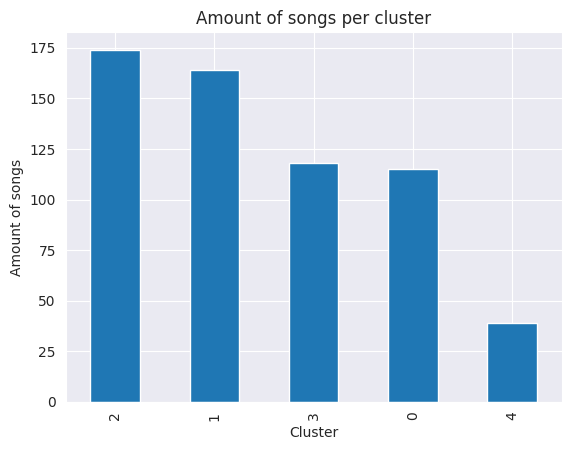

In [ ]:
df_cluster['cluster'] = kmeans_01.labels_

df_cluster['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

## J. Music or Mood Cluster

In [ ]:
df_cluster.head()

In [ ]:
# calculate mean of each variable
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = df_cluster[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar

,cluster,danceability,key,mode,valence,tempo
0,0,0.320899,0.800000,0.0,0.160771,0.409548
1,1,0.284468,0.145787,1.0,0.121441,0.389346
2,2,0.291478,0.691223,1.0,0.115088,0.432557
3,3,0.356660,0.255008,0.0,0.179198,0.376716
4,4,0.645824,0.531469,1.0,0.597128,0.530156


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   acousticness      5235 non-null   float64
 3   instrumentalness  5235 non-null   float64
 4   cluster           5235 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 184.2 KB


In [ ]:
df_cluster['cluster'].value_counts()

0    2776
2     953
3     896
1     610
Name: cluster, dtype: int64

## K. Radar Chart for Cluster 1

In [ ]:
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

In [ ]:
from math import pi, ceil

In [ ]:
# initialize the figure
plt.figure(figsize=(24,15))

# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(df_radar.index))

# Create cluster name
title_list = ['LIVE', 'RELAXED', 'AGITATED', 'POSITIVE/DANCE']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

## L. Assigning Cluster to Orginal data to cluster again cluster 1.

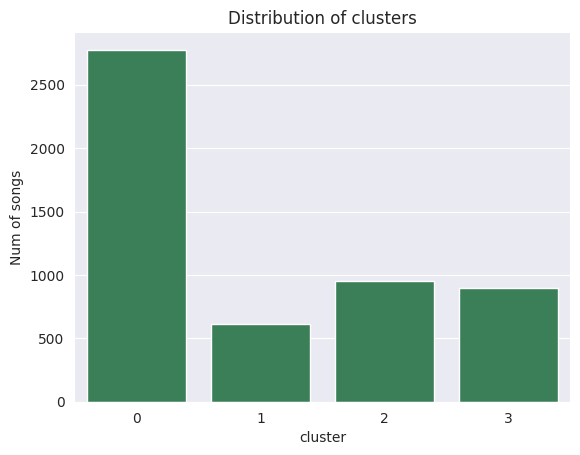

In [ ]:
# assign label to recent dataframe
songs.loc[:,'cluster'] = kmeans_01.labels_
df_cluster_size = songs.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data=df_cluster_size, x='cluster', y='Num of songs', color='seagreen')
plt.title('Distribution of clusters')
plt.show()

In [ ]:
songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,3
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,0
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,0
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,3
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,3


## M. Working Again to with Cluster 1

In [ ]:
songs_S = songs[songs["cluster"] == 1]

In [ ]:
songs_S = songs_S.reset_index(drop=True)

In [ ]:
songs_S.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster
0,Blue Bossa - Remastered ...,Joe Henderson,0.480,0.433,5,-9.909,0,0.0532,0.608,0.694,0.1080,0.897,82.315,,271147,4,26g2HsIOznFYeJWR9zhRXZ,https://open.spotify.com/track/26g2HsIOznFYeJW...,1
1,Aquarela Do Brasil ...,Carlos Barbosa-Lima,0.423,0.252,4,-19.264,0,0.0467,0.963,0.901,0.1050,0.438,81.025,,207160,4,3ftxaxht5yQW99vNcibmUC,https://open.spotify.com/track/3ftxaxht5yQW99v...,1
2,Brigas Nunca Mais ...,Brazilian Jazz,0.529,0.276,0,-14.859,1,0.0457,0.972,0.885,0.1330,0.280,96.134,,146800,4,5gvBgfXusUpxjOWHyYJXVg,https://open.spotify.com/track/5gvBgfXusUpxjOW...,1
3,Aquarela Do Brasil ...,Voyager,0.449,0.145,9,-19.732,1,0.0484,0.937,0.919,0.0769,0.304,91.330,,227400,3,3pjbCjL1IlqOfuQ8YOkX6o,https://open.spotify.com/track/3pjbCjL1IlqOfuQ...,1
4,Batida Diferente ...,Cannonball Adderley,0.605,0.485,7,-10.918,1,0.0512,0.876,0.841,0.1260,0.694,99.419,,207724,4,09VxH0oobfXR1bRXZ78VXP,https://open.spotify.com/track/09VxH0oobfXR1bR...,1


In [ ]:
songs_S.info()

## N. Keys & Mode to find Ross playlist

In [ ]:
# change keys to letter representations
keys = {0:'C', 1:'Db',2:'D',3:'Eb',4:'E',5:'F',6:'F#',7:'G',8:'Ab',9:'A',10:'Bb',11:'B'}
# create new column in df
songs_S['letter_keys'] = songs_S['key'].map(keys)

In [ ]:
# change mode to maj/min representations
modes = {0:'Minor',1:'Major'}
# create new column in df
songs_S['modes'] = songs_S['mode'].map(modes)

Text(0.5, 0, '')

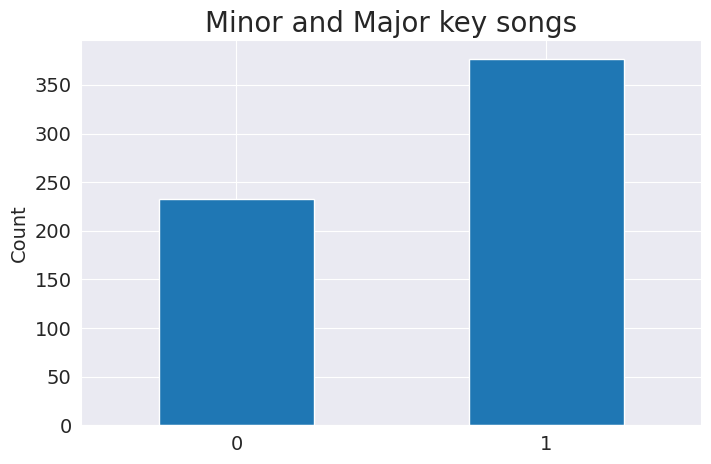

In [ ]:
# major or minor key songs
songs_S.groupby('mode')['mode'].count().plot(kind='bar',
                                             figsize=(8,5),
                                              fontsize=14,
                                             rot='horizontal')
plt.title("Minor and Major key songs", fontdict={'fontsize':20})
plt.ylabel('Count', fontdict={'fontsize':14})
plt.xlabel('')


In [ ]:
# create a column that concatonates key with mode
songs_S['key_mode'] = songs_S['letter_keys'] + " " + songs_S['modes']

In [ ]:
songs_S.groupby(["key_mode"]).agg({"key_mode": "count"})

In [ ]:
songs_S[songs_S["key_mode"] == "D Minor"]

## O. Repeat process again on Cluster 1

In [ ]:
# Extra
X_con = songs_S.iloc[:,2:13]

In [ ]:
songs_S.head()

In [ ]:
X_con.head(2)

## P. Ross Playlist

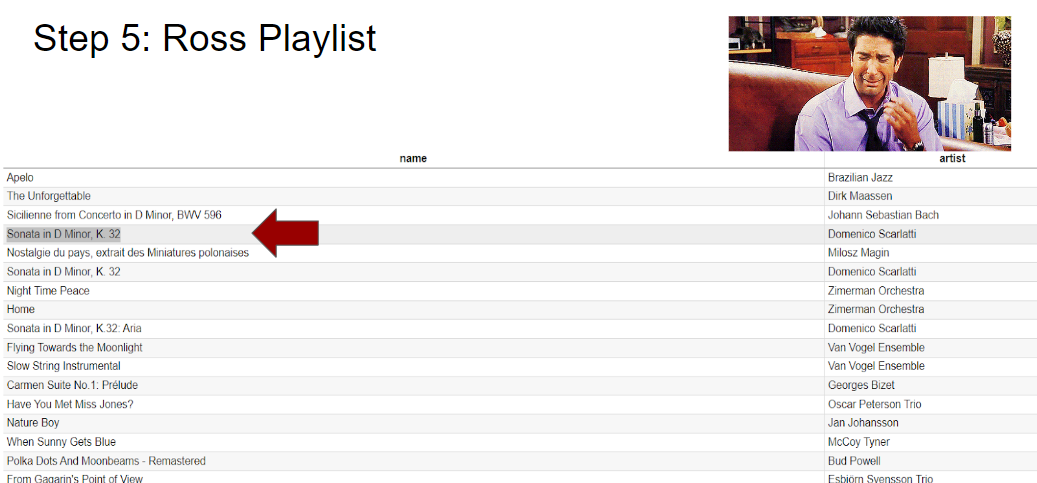

In [ ]:
df_cluster

In [ ]:
df_cluster['cluster'].value_counts()

In [ ]:
songs_S

In [ ]:
# assign label to recent dataframe
songs_S.loc[:,'cluster'] = kmeans_01.labels_
df_cluster_size = songs_S.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data=df_cluster_size, x='cluster', y='Num of songs', color='seagreen')
plt.title('Distribution of clusters')
plt.show()

In [ ]:
df_radar

In [ ]:
df_cluster['cluster'].value_counts()

In [ ]:
songs_S.groupby(["cluster","key_mode"]).agg({"key_mode": "count"})

In [ ]:
songs_S[(songs_S["cluster"] == 3) & (songs_S["key_mode"] == "F Minor")]

In [ ]:
songs_S.head(3)

In [ ]:
songs_S.loc[songs_S["cluster"] == 3,(["name","artist"])]

In [ ]:
songs_S.loc[(songs_S["cluster"] == 3) & (songs_S["key_mode"] == "D Minor"),(["name","artist"])]

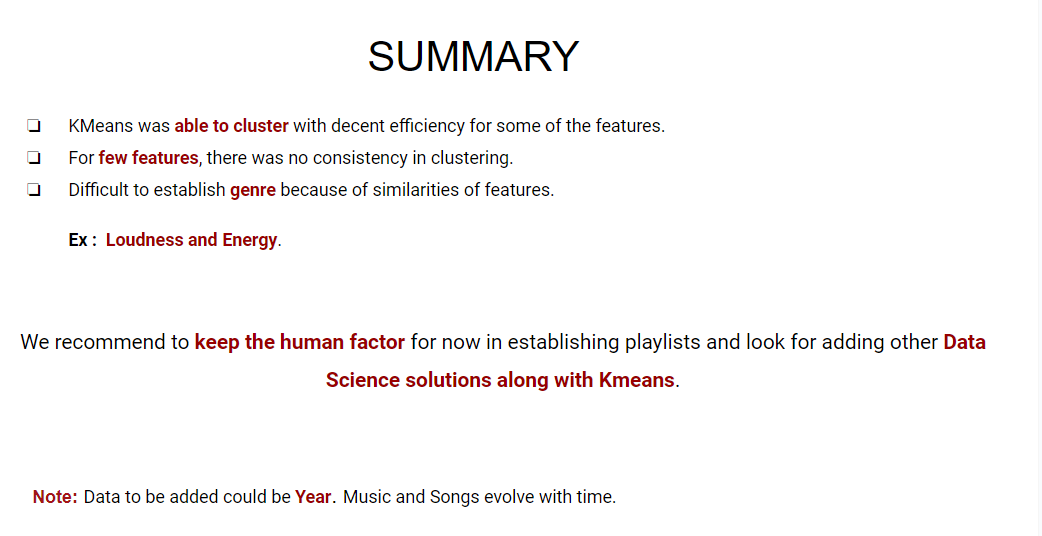